## Import packages and default parameters

In [2]:
import lnls.rotating_coil as rc
import lnls.utils as ut
import imp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import imp as reload_tool
reload_tool.reload(rc);

# f  = plt.figure(figsize=(8,40))
# gs = gridspec.GridSpec(7, 1)
# gs.update(left=0.2,top=0.98,bottom=0.02,right=0.95,hspace=0.22,wspace=0.05)
# ax1 = plt.subplot(gs[0,0])

%matplotlib notebook

# --- load default analysis parameters for SI Q14 ---
parms = rc.SI_Q20_AnalysisParameters()
print('SI Q20 Default Analysis Parameters'); 
print('==================================')
print(parms)

SI Q20 Default Analysis Parameters
label                          Parameters for SI Q20 quadrupoles
main_harmonic                  2 (quadrupole)
main_harmonic_is_skew          False
reference_radius[mm]           12.000000
harmonics                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


## Load files and run analysis 

In [4]:
# --- loads and performs analysis of data files ---

print('--- measurements M1')
fnames = ut.files_get_matches('../../../measurement/magnetic/rotcoil/Q20-001/2016-09-30/coils-main/M1')
m1 = rc.run_analysis(parms, fnames); 
print('--- measurements M2')
fnames = ut.files_get_matches('../../../measurement/magnetic/rotcoil/Q20-001/2016-09-30/coils-main/M2')
m2 = rc.run_analysis(parms, fnames); 
print('--- measurements M3')
fnames = ut.files_get_matches('../../../measurement/magnetic/rotcoil/Q20-001/2016-09-30/coils-main/M3')
m3 = rc.run_analysis(parms, fnames); 

all_data = [[m1, m2, m3],]

--- measurements M1
00 - Q20-001_Q_BOB_+0000A_160930_115034.dat, current:   +0.0072 +/- 0.0002
01 - Q20-001_Q_BOB_+0002A_160930_115123.dat, current:   +2.0056 +/- 0.0003
02 - Q20-001_Q_BOB_+0004A_160930_115211.dat, current:   +4.0012 +/- 0.0005
03 - Q20-001_Q_BOB_+0006A_160930_115259.dat, current:   +5.9961 +/- 0.0007
04 - Q20-001_Q_BOB_+0008A_160930_115347.dat, current:   +7.9916 +/- 0.0011
05 - Q20-001_Q_BOB_+0010A_160930_115436.dat, current:   +9.9880 +/- 0.0027
06 - Q20-001_Q_BOB_+0030A_160930_115526.dat, current:  +29.9706 +/- 0.0021
07 - Q20-001_Q_BOB_+0050A_160930_115617.dat, current:  +49.9669 +/- 0.0005
08 - Q20-001_Q_BOB_+0070A_160930_115707.dat, current:  +69.9695 +/- 0.0008
09 - Q20-001_Q_BOB_+0090A_160930_115757.dat, current:  +89.9586 +/- 0.0011
10 - Q20-001_Q_BOB_+0110A_160930_115848.dat, current: +109.9459 +/- 0.0015
11 - Q20-001_Q_BOB_+0130A_160930_115938.dat, current: +129.9474 +/- 0.0014
12 - Q20-001_Q_BOB_+0150A_160930_120029.dat, current: +149.9064 +/- 0.0013
13 - 

## Remanent field

In [5]:
# calculates remanent field for data points with excitation currents below a certain threshold
# it is assumed that data is taken afetr demagnetization procudure.

(polya_avg,polya_std),(polyb_avg,polyb_std) = rc.get_remanent_field(all_data, current_threshold=0.5)
print('                 normal                   |  skew')
print('                ----------------------------------------------------')
print('dipole [T.m]   : {2:+.3e} +/- {3:.3e} | {0:+.3e} +/- {1:.3e} '.format(polya_avg[0], polya_std[0], polyb_avg[0], polyb_std[0]))
print('quadrupole [T] : {2:+.3e} +/- {3:.3e} | {0:+.3e} +/- {1:.3e} '.format(polya_avg[1], polya_std[1], polyb_avg[1], polyb_std[1]))
print('sextupole [T/m]: {2:+.3e} +/- {3:.3e} | {0:+.3e} +/- {1:.3e} '.format(polya_avg[2], polya_std[2], polyb_avg[2], polyb_std[2]))
print('')

                 normal                   |  skew
                ----------------------------------------------------
dipole [T.m]   : +5.952e-06 +/- 1.230e-06 | +1.186e-06 +/- 8.873e-07 
quadrupole [T] : +1.797e-02 +/- 1.785e-02 | +1.968e-05 +/- 1.160e-05 
sextupole [T/m]: +4.560e-03 +/- 3.629e-03 | -1.992e-05 +/- 9.644e-04 



## Maximum quadrupole strength

In [6]:
ML = parms.max_integ_mult_spec # [T]

print('{0:<35s}: {1:+.3f} [T]'.format('max integrated quadrupole (spec)', ML))
d, max_current = rc.get_maximum_main_multipole(m1,parms,0.5); 
print('medida 01 - {0:<30s}: {1:+.4f} [T] ({2:+.1f} %) @ {3:.3f} A'.format('max. integ. quad. (data)', d, 100*(d-ML)/ML, max_current))
d, max_current = rc.get_maximum_main_multipole(m2,parms,0.5); 
print('medida 02 - {0:<30s}: {1:+.4f} [T] ({2:+.1f} %) @ {3:.3f} A'.format('max. integ. quad. (data)', d, 100*(d-ML)/ML, max_current))
d, max_current = rc.get_maximum_main_multipole(m3,parms,0.5); 
print('medida 03 - {0:<30s}: {1:+.4f} [T] ({2:+.1f} %) @ {3:.3f} A'.format('max. integ. quad. (data)', d, 100*(d-ML)/ML, max_current))

max integrated quadrupole (spec)   : +9.086 [T]
medida 01 - max. integ. quad. (data)      : +8.7494 [T] (-3.7 %) @ 149.906 A
medida 02 - max. integ. quad. (data)      : +8.7506 [T] (-3.7 %) @ 149.894 A
medida 03 - max. integ. quad. (data)      : +8.7517 [T] (-3.7 %) @ 149.913 A


## Current Values at 3 GeV

In [14]:
q14_len = 0.14

qfa_K = 3.554977601176462
q1_K  = 2.901583657954851
q2_K  = 4.268615906892407
q3_K  = 3.290111749178743
q4_K  = 3.870354374149453
    
    
energy  = 3e9
I_3gev_qfa_avg,  I_3gev_qfa_std  = rc.find_current(all_data[0], parms, multi_norm=-qfa_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
I_3gev_q1_avg, I_3gev_q1_std = rc.find_current(all_data[0], parms, multi_norm=-q1_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
I_3gev_q2_avg, I_3gev_q2_std = rc.find_current(all_data[0], parms, multi_norm=-q2_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
I_3gev_q3_avg, I_3gev_q3_std = rc.find_current(all_data[0], parms, multi_norm=-q3_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
I_3gev_q4_avg, I_3gev_q4_std = rc.find_current(all_data[0], parms, multi_norm=-q4_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('QFA',I_3gev_qfa_avg,I_3gev_qfa_std))
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('Q1',I_3gev_q1_avg,I_3gev_q1_std))
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('Q2',I_3gev_q2_avg,I_3gev_q2_std))
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('Q3',I_3gev_q3_avg,I_3gev_q3_std))
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('Q4',I_3gev_q4_avg,I_3gev_q4_std))

QFA  current [A] :  84.055 +/- 0.0099
Q1   current [A] :  68.534 +/- 0.0065
Q2   current [A] : 101.100 +/- 0.0168
Q3   current [A] :  77.759 +/- 0.0084
Q4   current [A] :  91.563 +/- 0.0120


## Normal Relative multipoles (saved to PNG files)

<IPython.core.display.Javascript object>


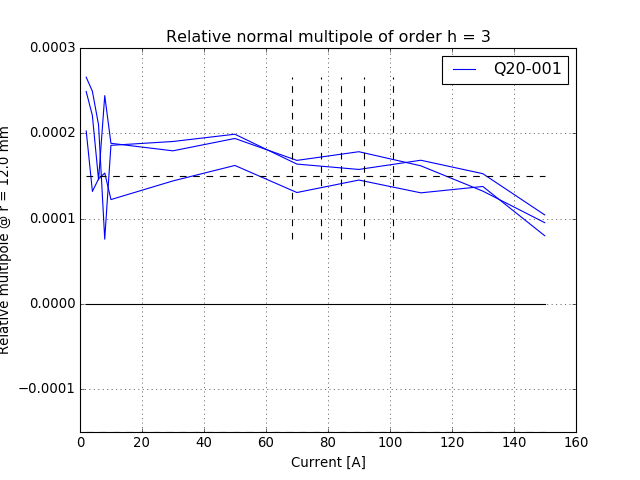

<IPython.core.display.Javascript object>


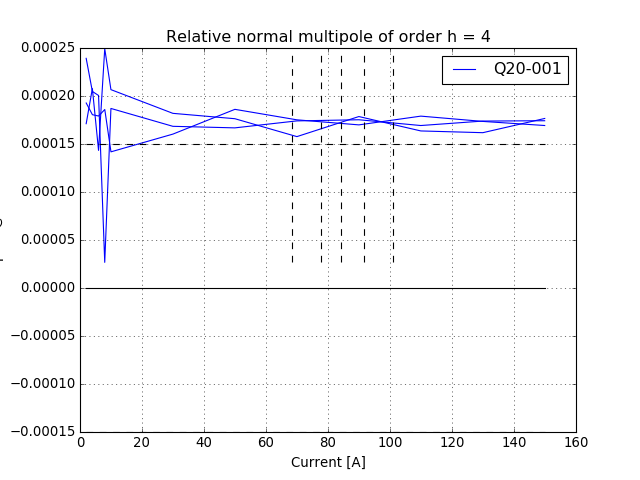

<IPython.core.display.Javascript object>


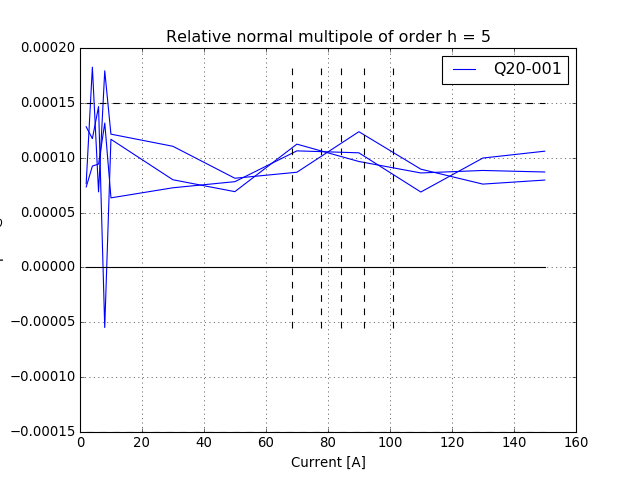

<IPython.core.display.Javascript object>


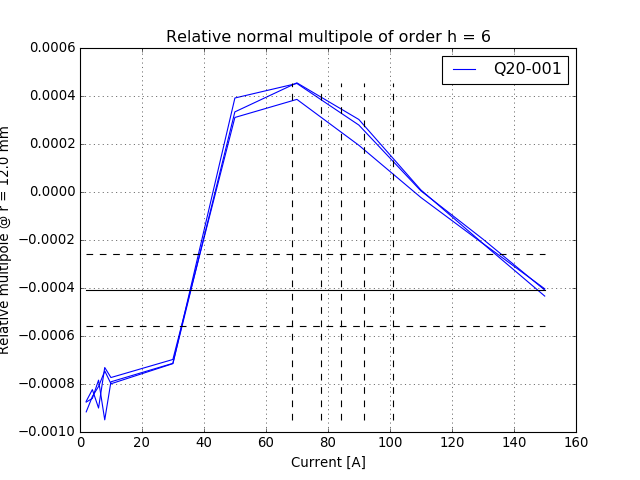

<IPython.core.display.Javascript object>


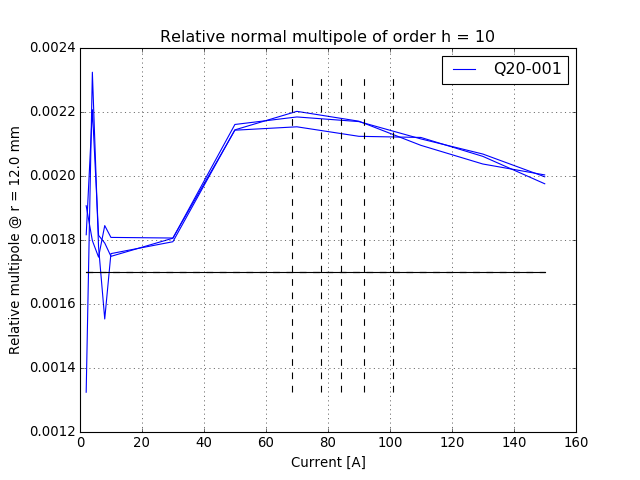

<IPython.core.display.Javascript object>


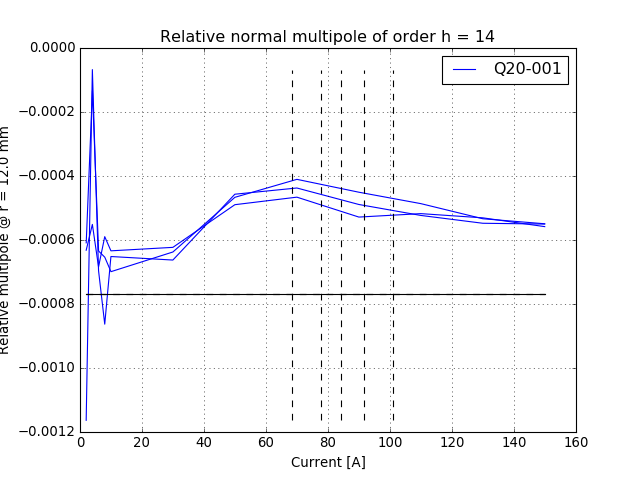

<IPython.core.display.Javascript object>


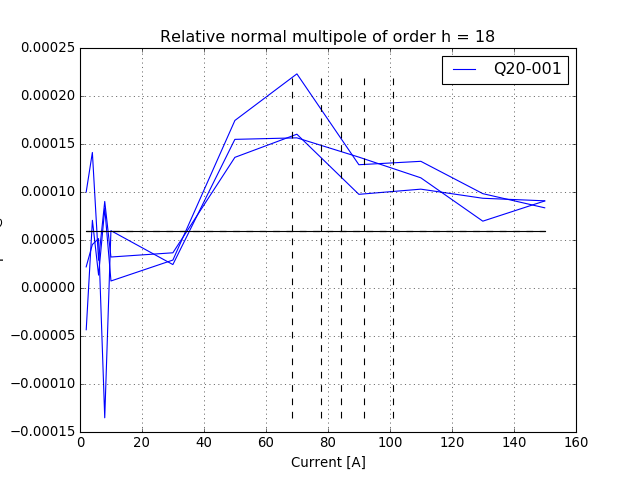

In [15]:
currents = [I_3gev_qfa_avg,I_3gev_q1_avg,I_3gev_q2_avg,I_3gev_q3_avg,I_3gev_q4_avg]
args = {'mtype':'normal','current_threshold':0.5,'currents':currents,'show':True}

rc.plot_relative_multipoles(all_data, parms, 3, **args)
rc.plot_relative_multipoles(all_data, parms, 4, **args)
rc.plot_relative_multipoles(all_data, parms, 5, **args)
rc.plot_relative_multipoles(all_data, parms, 6, **args)
rc.plot_relative_multipoles(all_data, parms, 10,**args)
rc.plot_relative_multipoles(all_data, parms, 14,**args)
rc.plot_relative_multipoles(all_data, parms, 18,**args)

## Skew Relative multipoles (saved to PNG files)

<IPython.core.display.Javascript object>


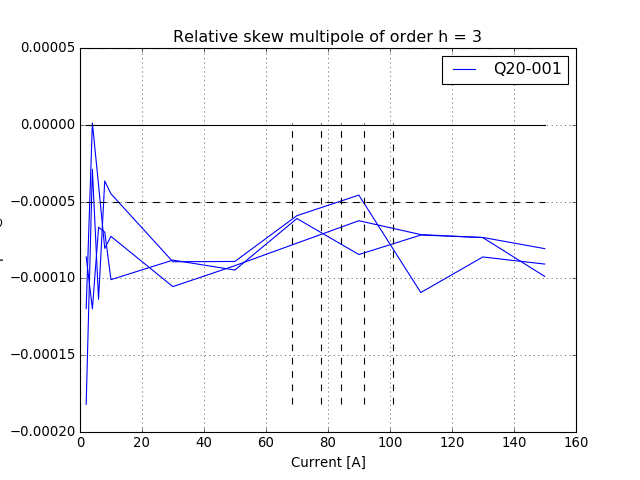

<IPython.core.display.Javascript object>


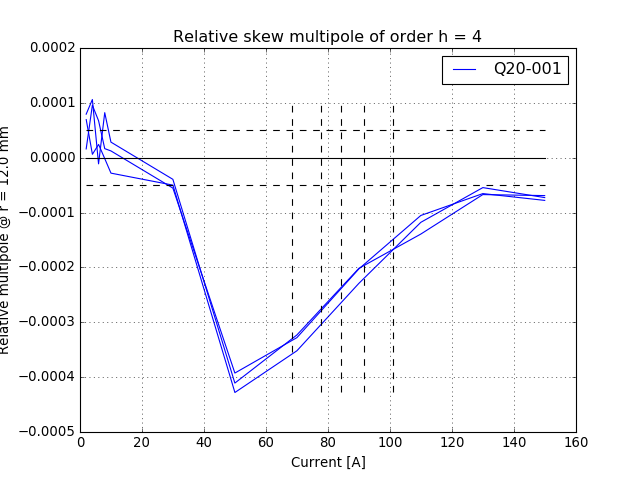

<IPython.core.display.Javascript object>


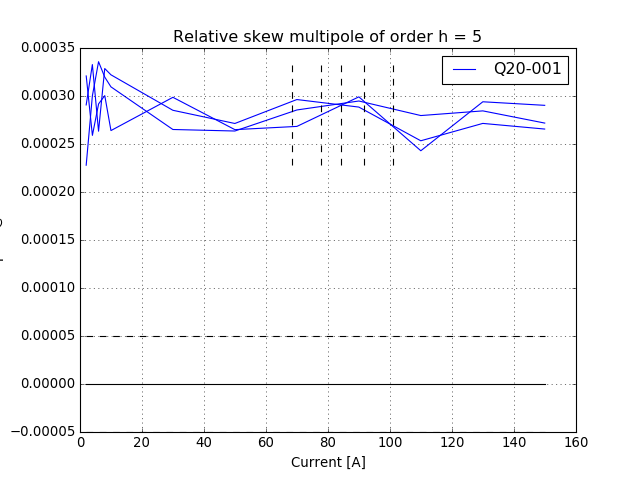

<IPython.core.display.Javascript object>


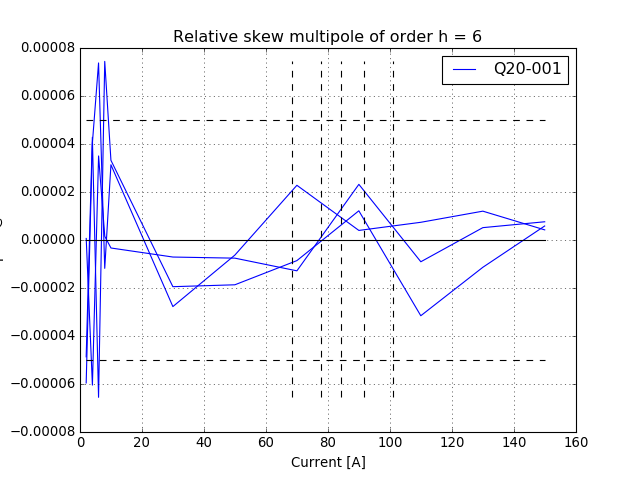

<IPython.core.display.Javascript object>


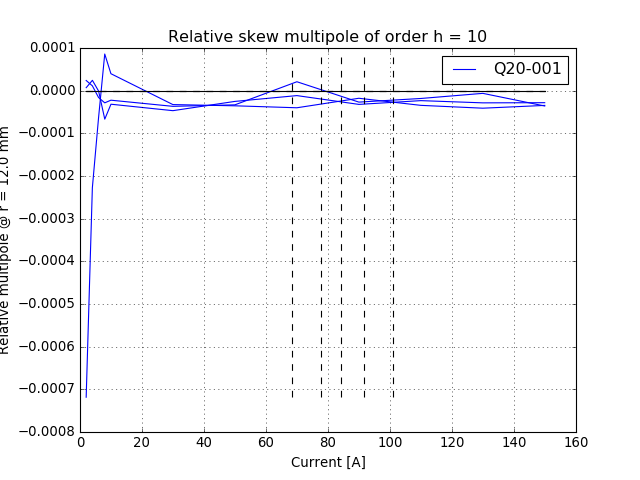

<IPython.core.display.Javascript object>


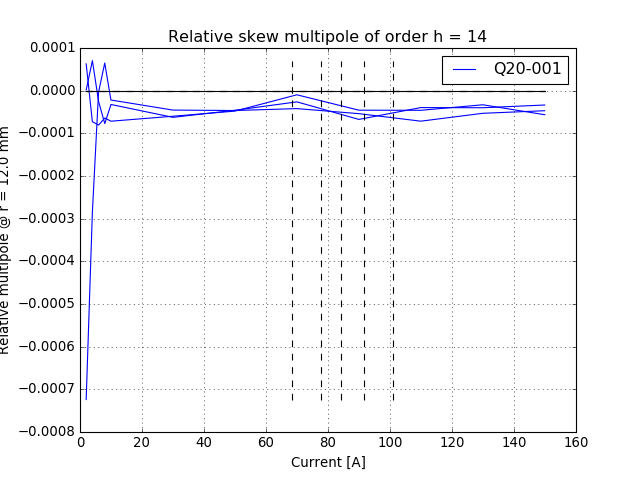

<IPython.core.display.Javascript object>


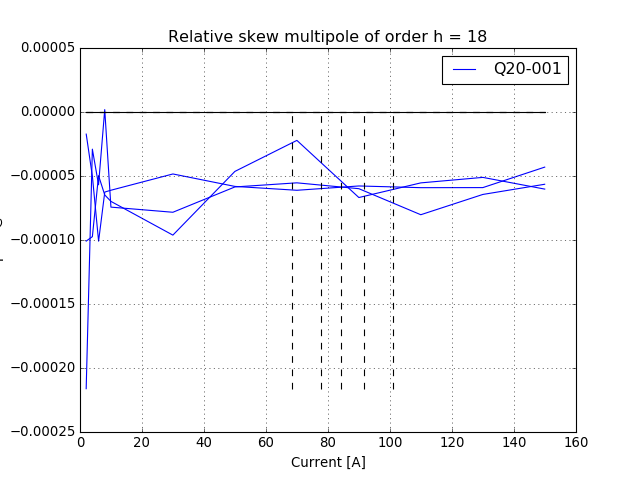

In [16]:
currents = [I_3gev_qfa_avg,I_3gev_q1_avg,I_3gev_q2_avg,I_3gev_q3_avg,I_3gev_q4_avg]
args = {'mtype':'skew','current_threshold':0.5,'currents':currents,'show':True}

rc.plot_relative_multipoles(all_data, parms, 3, **args)
rc.plot_relative_multipoles(all_data, parms, 4, **args)
rc.plot_relative_multipoles(all_data, parms, 5, **args)
rc.plot_relative_multipoles(all_data, parms, 6, **args)
rc.plot_relative_multipoles(all_data, parms, 10,**args)
rc.plot_relative_multipoles(all_data, parms, 14,**args)
rc.plot_relative_multipoles(all_data, parms, 18,**args)


## Magnetic Center and Rotation Angle

<IPython.core.display.Javascript object>


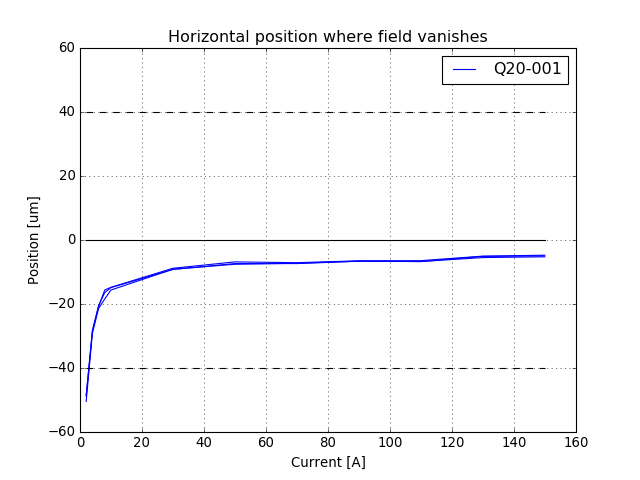

<IPython.core.display.Javascript object>


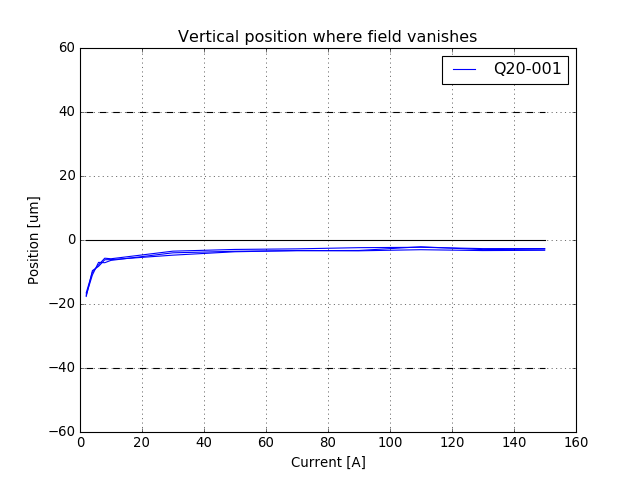

<IPython.core.display.Javascript object>


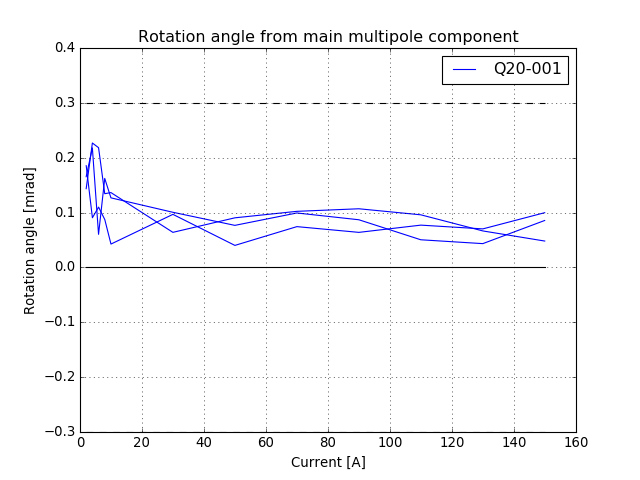

In [10]:
show_flag = True
marked_currents=[I_3gev_qda_avg,I_3gev_qdb1_avg,I_3gev_qdb2_avg]
marked_currents=None

# --- Magnetic center
rc.plot_magnetic_center(all_data, parms, mtype='normal', currents=marked_currents, show=show_flag, ylim=(-60,60))
rc.plot_magnetic_center(all_data, parms, mtype='skew',   currents=marked_currents, show=show_flag, ylim=(-60,60))

# --- Rotation Angle
rc.plot_rotation_angle(all_data, parms, currents=marked_currents, show=show_flag)

In [11]:
print('\n[3 GeV]\n\n')
max_current = 150
rc.print_multipoles_single_magnet(all_data, parms, max_current, 0.5)
print()


[3 GeV]


h  :      (B_n/B_2)@r_0        |       (A_n/B_2)@r_0      
----------------------------------------------------------
01 : +4.156e-04 +/- 1.722e-05  |  +2.429e-04 +/- 1.873e-05
02 : +1.000e+00 +/- 0.000e+00  |  +7.781e-05 +/- 2.181e-05
03 : +9.326e-05 +/- 1.007e-05  |  -9.000e-05 +/- 7.397e-06
04 : +1.734e-04 +/- 3.060e-06  |  -7.318e-05 +/- 3.585e-06
05 : +9.086e-05 +/- 1.109e-05  |  +2.759e-04 +/- 1.049e-05
06 : -4.151e-04 +/- 1.329e-05  |  +5.885e-06 +/- 1.379e-06
07 : +7.861e-05 +/- 1.964e-06  |  +1.750e-05 +/- 1.927e-06
08 : +6.894e-05 +/- 2.282e-06  |  -8.768e-05 +/- 2.785e-06
09 : +7.023e-05 +/- 5.515e-06  |  -6.762e-05 +/- 2.165e-06
10 : +1.992e-03 +/- 1.191e-05  |  -3.289e-05 +/- 3.383e-06
11 : +7.259e-05 +/- 2.701e-06  |  -3.157e-05 +/- 1.894e-06
12 : +7.851e-05 +/- 2.253e-06  |  -5.890e-05 +/- 2.752e-06
13 : +5.498e-05 +/- 3.315e-06  |  -2.967e-05 +/- 2.430e-06
14 : -5.525e-04 +/- 4.013e-06  |  -4.564e-05 +/- 9.325e-06
15 : +5.416e-05 +/- 4.822e-06  |  -5.086e-05 

In [75]:
import imp as reload_tool
reload_tool.reload(rc);


q14_len = 0.14
qda_K   = -1.541381856015229
qdb1_K  = -2.038187125575815
qdb2_K  = -3.277876202317892

energy  = 3e9
I_3gev_qda_avg,  I_3gev_qda_std  = rc.find_current(all_data[0], parms, multi_norm=qda_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
I_3gev_qdb1_avg, I_3gev_qdb1_std = rc.find_current(all_data[0], parms, multi_norm=qdb1_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
I_3gev_qdb2_avg, I_3gev_qdb2_std = rc.find_current(all_data[0], parms, multi_norm=qdb2_K*q14_len, energy=energy, mtype='normal', current_threshold=0.0)
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('QDA',I_3gev_qda_avg,I_3gev_qda_std))
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('QDB1',I_3gev_qdb1_avg,I_3gev_qdb1_std))
print('{0:<4s} current [A] : {1:7.3f} +/- {2:.4f}'.format('QDB2',I_3gev_qdb2_avg,I_3gev_qdb2_std))

QDA  current [A] :  60.298 +/- 0.0084
QDB1 current [A] :  79.692 +/- 0.0002
QDB2 current [A] : 128.689 +/- 0.0185
